In [3]:
library(glmmSeq)
setwd('/lustre/scratch117/cellgen/team297/kt16/COVID_imperial_renal/')

Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 



In [4]:
load('h5ad/df.fil3_gex_bcells_vdj_sce_B_mem_all_deg.RData')
ls()

[1] "plotGSEA_Hallmark" "res1"              "res2"             
 [4] "res3"              "res4"              "res5"             
 [7] "results1"          "results2"          "results3"         
[10] "results4"          "results5"

In [5]:
library(dplyr)
makeGeneList <- function(gl, beta_column='LFC'){
    y <- grepl('^RPS|^RPL|^MT-', row.names(gl))
    gl <- gl[!y, ]
    rank <- -log10(gl$pval) * sign(gl[,beta_column])
    rank[which(rank == Inf)] <- 300
    rank[which(rank == -Inf)] <- 300
    names(rank) <- row.names(gl)
    rank <- rev(sort(rank))
    gl <- rank
    return(gl)
}


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [6]:
head(results1)
dim(results1)

,fixed-effects estimates,pval,qval,LFC,Singular,Conv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MTRNR2L8,1.3125906,0.0551480556,0.204443262,1.8847631,0,0
AC010642.2,0.9815628,0.0002807412,0.006689353,1.0828354,0,0
RCL1,0.8408919,0.0008096479,0.017301874,0.8907733,0,0
IFI27,0.8360270,0.1272339517,0.300859484,1.0314277,0,0
LINC02256,0.7616131,0.0020637747,0.036910388,0.8721379,0,0
ZNF544,0.7408002,0.0073958795,0.082081056,0.7192977,0,0


[1] 7103    6

In [7]:
head(results2)
dim(results2)

,fixed-effects estimates_linear,fixed-effects estimates_quadratic,pval,qval,Singular,Conv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AC233755.1,-0.20971467,3.416195,1.735815e-02,1.966421e-02,0,0
SEL1L,0.15216537,2.952871,6.645047e-12,3.999049e-11,0,0
SH2D3C,0.06036991,2.948863,3.078988e-08,1.083891e-07,0,0
ZNF429,0.12752664,2.891467,9.036063e-08,2.876552e-07,0,0
TMOD2,0.58063110,2.869238,4.776504e-08,1.609550e-07,0,0
IGLL5,-0.43866369,2.764841,3.356944e-05,6.181237e-05,0,0


[1] 4951    6

In [8]:
head(results3)
dim(results3)

,fixed-effects estimates,pval,qval,LFC,Singular,Conv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C14orf119,0.7456005,0.02979569,0.9998917,0.8374690,0,0
NLGN4Y,0.7289562,0.08479029,0.9998917,0.5514308,0,0
TNFSF10,0.6897267,0.02310624,0.9998917,0.8012620,0,0
OAS1,0.6646246,0.02127538,0.9998917,0.8976739,0,0
PRDX3,0.6564271,0.02460419,0.9998917,0.8347682,0,0
DDX60,0.6308613,0.04531656,0.9998917,0.7206237,0,0


[1] 7872    6

In [9]:
head(results4)
dim(results4)

,fixed-effects estimates,pval,qval,LFC,Singular,Conv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
JUN,1.0710312,2.861795e-06,6.988372e-05,1.535368,0,0
GTF2B,1.0664889,1.267994e-03,1.526262e-02,1.335979,0,0
RICTOR,1.0162973,1.531097e-04,2.427474e-03,1.316632,0,0
CD69,0.9964416,4.192540e-07,1.171980e-05,1.411619,0,0
PMAIP1,0.9894974,3.522969e-06,8.409604e-05,1.379343,0,0
KLF6,0.9710165,1.139942e-05,2.409758e-04,1.395075,0,0


[1] 3791    6

In [10]:
head(results5)
dim(results5)

,fixed-effects estimates,pval,qval,LFC,Singular,Conv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IFI27,2.068802,4.065687e-03,9.723081e-02,2.106850,0,0
IFIT3,1.806561,1.148555e-03,3.293454e-02,2.084868,0,0
ISG15,1.717446,1.145811e-05,3.845627e-04,2.310858,0,0
IFITM1,1.644134,5.333115e-207,5.625484e-205,2.308672,0,0
XAF1,1.520838,9.900472e-06,3.341834e-04,2.063507,0,0
CMPK2,1.495467,3.147730e-03,7.912188e-02,1.540412,0,0


[1] 5573    6

In [11]:
library(fgsea)
library(msigdbr)

In [12]:
h <- data.frame(msigdbr::msigdbr(category = "H", species = 'Homo sapiens'))
h <- split(h, h$gs_name)
h <- lapply(h, function(x) x %>% dplyr::select(gene_symbol) %>% unlist %>% as.character)

In [13]:
plotGSEA_Hallmark <- function(gsea, fdr_cutoff = 0.25, cols = NULL, xlim = NULL, newlabels = NULL, keep_significant_only = TRUE, jitter = FALSE) {
    require(ggplot2)
    gsea$NES[which(is.na(gsea$NES))] <- 0
    gsea$pval[which(is.na(gsea$pval))] <- 1
    gsea$padj[which(is.na(gsea$padj))] <- 1
    gsea$ranking[which(is.na(gsea$ranking))] <- 0
    gsea <- gsea[order(gsea$ranking),]
    
    if (keep_significant_only){
        gseax <- split(gsea, gsea$pathway)
        for (i in 1:length(gseax)){
            if (all(gseax[[i]]$pval >= 0.05)|all(gseax[[i]]$padj >=fdr_cutoff)){
                gseax[[i]] <- NA        
            }
        }
        gseax <- gseax[!is.na(gseax)]
        gsea <- do.call(rbind, gseax)        
    }
    if (!is.null(gsea)){
        gsea <- gsea[order(gsea$ranking), ]
        gsea$pathway <- gsub("HALLMARK_|", "", gsea$pathway)

        if (!is.null(xlim)){
            x_lim_min = -xlim
            x_lim_max = xlim
        } else {
            x_lim_min <- abs(ceiling(min(-log10(gsea$padj))))
            x_lim_max <- abs(ceiling(max(-log10(gsea$padj))))
        }
        
        if(x_lim_min > x_lim_max){
            xval1 <- x_lim_min * -1
            xval2 <- x_lim_min
        } else {
            xval1 <- x_lim_max * -1
            xval2 <- x_lim_max
        }

        if(!is.null(cols)){
            gg_color_hue <- function(n) {
                hues = seq(15, 375, length = n + 1)
                hcl(h = hues, l = 65, c = 100)[1:n]
            }
            cols. = gg_color_hue(dplyr::n_distinct(gsea$group, na.rm = TRUE))
        } else {
            cols. = cols
        }    
    
        g <- ggplot(gsea, aes(x = -log10(padj)*sign(NES), y = reorder(pathway, ranking), col = -log10(padj)*sign(NES), size = abs(NES)))
        if (jitter){
            g <- g + geom_point(position = 'jitter')
        }else{
            g <- g + geom_point()
        }
        g <- g + theme_bw() +
            labs(x = expression(paste("Signed", " -log" ["10"], "adjusted pval")), y = "Hallmarks") +
            geom_vline(xintercept = 0) +
            geom_vline(xintercept = -log10(fdr_cutoff)) +
            geom_vline(xintercept = -log10(fdr_cutoff)*-1) +
            scale_x_continuous(limits = c(xval1, xval2), oob = scales::squish) +
            scale_size_area(oob = scales::squish, max_size = 3, limits = c(0,2)) +
            theme(panel.grid.major = element_blank(), 
                panel.grid.minor = element_blank(), 
                panel.background = element_blank(), 
                axis.line = element_blank(), 
                axis.ticks = element_blank(),
                axis.text = element_text(color = 'black'),
                axis.title = element_text(color = 'black'))
        
        return(g)
    }
}

Warning message in fgseaMultilevel(...):
“There were 1 pathways for which P-values were not calculated properly due to unbalanced (positive and negative) gene-level statistic values. For such pathways pval, padj, NES, log2err are set to NA. You can try to increase the value of the argument nPermSimple (for example set it nPermSimple = 10000)”
Warning message in fgseaMultilevel(...):
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”
Loading required package: ggplot2



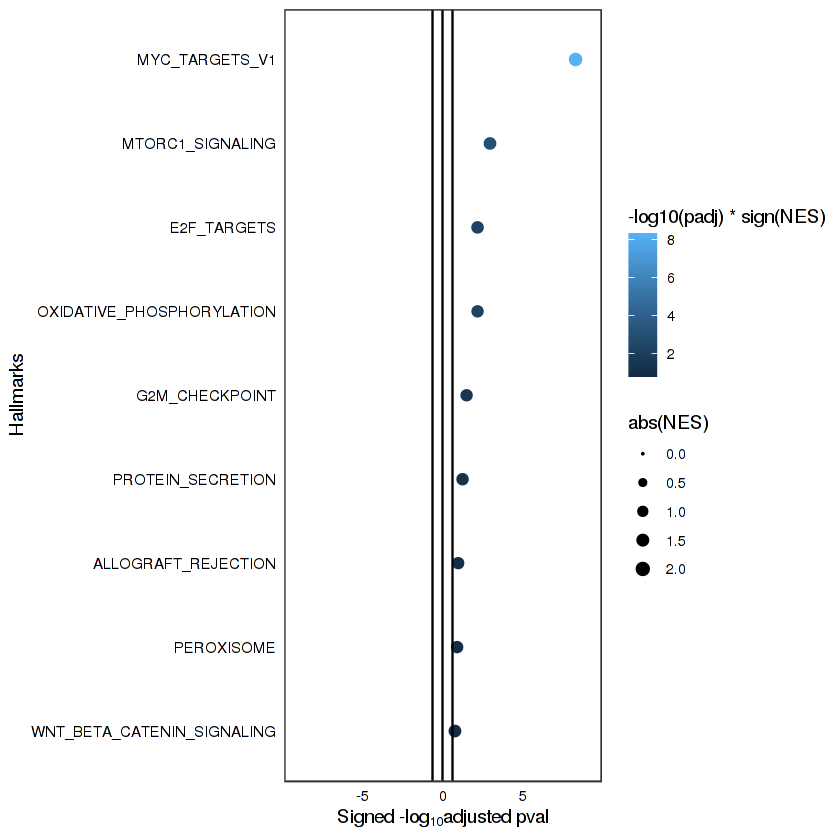

In [14]:
gl1 <- makeGeneList(results1)
res1gsea <- fgsea(pathways = h, stats = gl1, minSize = 0, maxSize =1000)
res1gsea$ranking <- -log10(res1gsea$pval) * sign(res1gsea$NES)
plotGSEA_Hallmark(res1gsea)

In [15]:
# gl2 <- makeGeneList(results2, 'fixed-effects estimates_linear')
# res2gsea <- fgsea(pathways = h, stats = gl2, minSize = 0, maxSize =1000)
# res2gsea$ranking <- -log10(res2gsea$pval) * sign(res2gsea$NES)
# plotGSEA_Hallmark(res2gsea)

In [16]:
# gl2 <- makeGeneList(results2, 'fixed-effects estimates_quadratic')
# res2gsea <- fgsea(pathways = h, stats = gl2, minSize = 0, maxSize =1000)
# res2gsea$ranking <- -log10(res2gsea$pval) * sign(res2gsea$NES)
# plotGSEA_Hallmark(res2gsea)

Warning message in fgseaMultilevel(...):
“There were 3 pathways for which P-values were not calculated properly due to unbalanced (positive and negative) gene-level statistic values. For such pathways pval, padj, NES, log2err are set to NA. You can try to increase the value of the argument nPermSimple (for example set it nPermSimple = 10000)”
Warning message in fgseaMultilevel(...):
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”


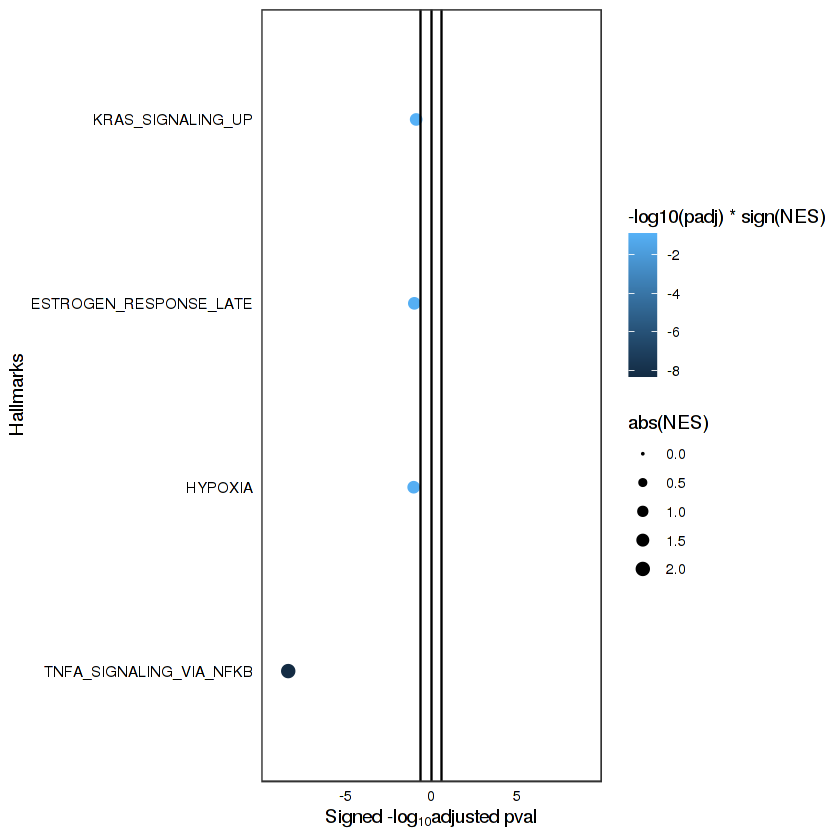

In [24]:
gl3 <- makeGeneList(results3)
res3gsea <- fgsea(pathways = h, stats = gl3, minSize = 0, maxSize =1000)
res3gsea$ranking <- -log10(res3gsea$pval) * sign(res3gsea$NES)
plotGSEA_Hallmark(res3gsea)

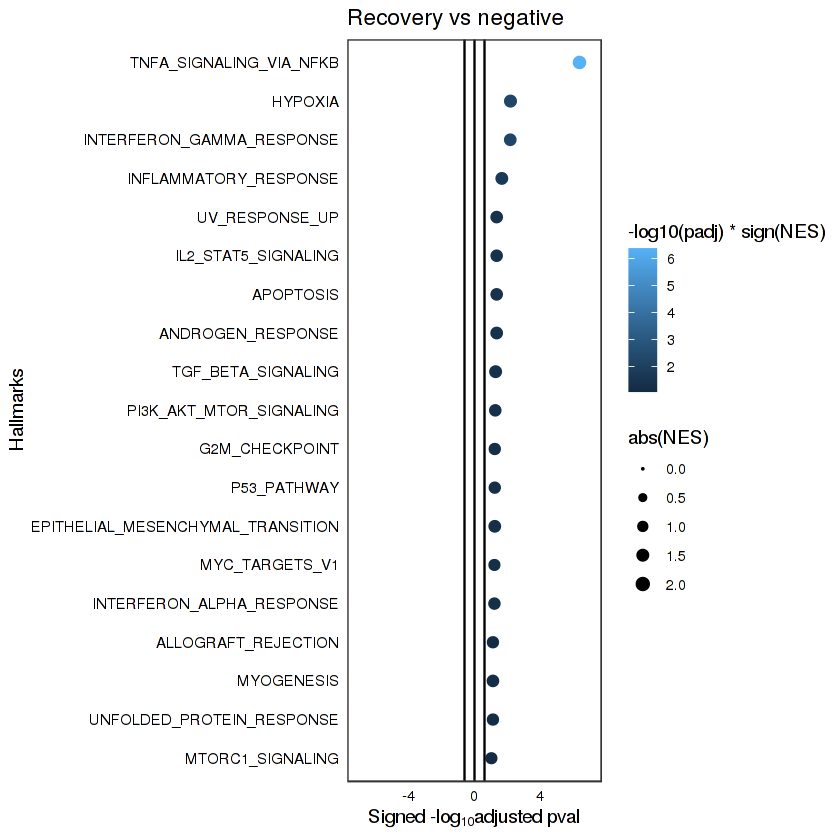

In [19]:
gl4 <- makeGeneList(results4)
res4gsea <- fgsea(pathways = h, stats = gl4, minSize = 0, maxSize =1000)
res4gsea$ranking <- -log10(res4gsea$pval) * sign(res4gsea$NES)
plotGSEA_Hallmark(res4gsea) + ggtitle('Recovery vs negative')

In [17]:
res4gsea

pathway,pval,padj,log2err,ES,NES,size,leadingEdge,ranking
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>,<dbl>
HALLMARK_ADIPOGENESIS,8.921079e-01,9.800800e-01,0.015866228,0.3530795,0.8082498,61,"UBC , G3BP2 , BAZ2A , ALDOA , PPP1R15B, CHCHD10 , PIM3 , DRAM2 , RIOK3 , ARL4A , DLD , GHITM , NDUFA5 , MDH2 , PPM1B , CMPK1 , TKT , UCP2 , GPX4 , UBQLN1 , MGST3 , TANK , CS , SAMM50 , IFNGR1 , ECHS1 , ACLY , UQCR10 , JAGN1 , SDHC , SLC25A1 , COX8A",0.049582619
HALLMARK_ALLOGRAFT_REJECTION,2.358078e-02,6.935524e-02,0.352487858,0.5586097,1.2826334,66,"CD74 , NPM1 , HLA-DRA, HLA-E , B2M , EIF3A , TAPBP , HLA-A , STAT1 , EIF5A , PTPRC , LYN , TGFB1 , HLA-DMA, DEGS1 , CD79A , IRF8 , HIF1A , WAS , CCND3 , CTSS , ETS1 , CSK , BCL3 , CD47 , CAPG , HDAC9 , LTB , CD86",1.627441833
HALLMARK_ANDROGEN_RESPONSE,6.377039e-03,3.542799e-02,0.407017919,0.6475837,1.4470812,34,"NGLY1 , SAT1 , B2M , PIAS1 , UBE2J1 , ELL2 , ARID5B , UBE2I , B4GALT1, IDI1 , MYL12A , CCND3 , INSIG1",2.195380951
HALLMARK_ANGIOGENESIS,7.349823e-01,9.365634e-01,0.089164712,-0.4388453,-0.8165724,3,LRPAP1,-0.133723101
HALLMARK_APICAL_JUNCTION,3.470000e-01,5.257576e-01,0.062661823,0.4764935,1.0728307,41,"PTPRC , B4GALT1, MYH9 , ACTB , STX4 , MSN , MYL12B , INSIG1 , CAP1 , ARPC2 , GTF2F1 , RAC2 , CD86 , PFN1 , YWHAH",0.459670525
HALLMARK_APICAL_SURFACE,6.462585e-02,1.468769e-01,0.186432558,0.7137012,1.3606741,8,"LYN , B4GALT1, FLOT2",1.189593729
HALLMARK_APOPTOSIS,3.277610e-03,2.947378e-02,0.431707696,0.6121453,1.3890552,53,"CD69 , JUN , PMAIP1 , TXNIP , CDKN1B , RHOB , IRF1 , SAT1 , SQSTM1 , ETF1 , SPTAN1 , DAP , MCL1 , CFLAR , ISG20 , BCL2L11, CTNNB1 , CD44",2.484442744
HALLMARK_BILE_ACID_METABOLISM,4.473684e-01,6.390977e-01,0.053129805,0.5098744,1.0388074,12,"IDI1 , PNPLA8 , OPTN , ALDH9A1, LONP2 , IDH2",0.349334675
HALLMARK_CHOLESTEROL_HOMEOSTASIS,7.900208e-02,1.717437e-01,0.159646702,0.6281518,1.3216478,16,"PNRC1 , TP53INP1, IDI1 , PLSCR1 , CTNNB1",1.102361480


In [18]:
res4gsea[res4gsea$pathway %in% c('HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'HALLMARK_HYPOXIA', 'HALLMARK_INTERFERON_GAMMA_RESPONSE', 'HALLMARK_INFLAMMATORY_RESPONSE'),'leadingEdge']

leadingEdge
<list>
"DUSP1 , JUN , KLF6 , PPP1R15A, PNRC1 , CDKN1B , CXCR4 , ZFP36 , HSPA5 , SLC2A3 , DDIT4 , ALDOA , FOS , MYH9 , IDS , ISG20"
"CD69 , KLF6 , NFKBIA , IRF1 , EMP3 , CD48 , TAPBP , IFITM1 , PDE4B , CD55 , NFKB1 , GPR183 , RHOG , LYN , EIF2AK2, HIF1A , SELL , LY6E , BTG2 , BST2 , ATP2B1"
"CD69 , CD74 , HLA-B , TXNIP , NFKBIA , PELI1 , IRF1 , B2M , TAPBP , HLA-A , STAT1 , STAT3 , PDE4B , NFKB1 , ARID5B , PSME1 , MX1 , SP110 , PARP14 , MX2 , EIF2AK2 , XAF1 , HLA-DMA , IFITM2 , IRF8 , HIF1A , ISG20 , PLSCR1 , HLA-DRB1, IFIH1 , PTPN1 , LY6E , NLRC5 , BST2 , ADAR , SAMD9L , IL10RA , ISG15 , CD86 , ARL4A , IFI35 , PARP12 , STAT2 , CD40 , JAK2 , TRIM25 , RNF213 , TNFAIP3 , OGFR , NCOA3"
"CD69 , DUSP1 , JUN , KLF2 , KLF6 , EIF1 , PPP1R15A, PNRC1 , NFKBIA , CD83 , JUNB , RHOB , IRF1 , REL , SAT1 , ZFP36 , NR4A2 , CCNL1 , SLC2A3 , SQSTM1 , PDE4B , IER5 , NFKB1 , MAP3K8 , GPR183 , RELB , B4GALT1 , FOS , NFKB2 , MCL1 , CFLAR , MARCKS , TNIP1 , KLF10 , IFIH1"


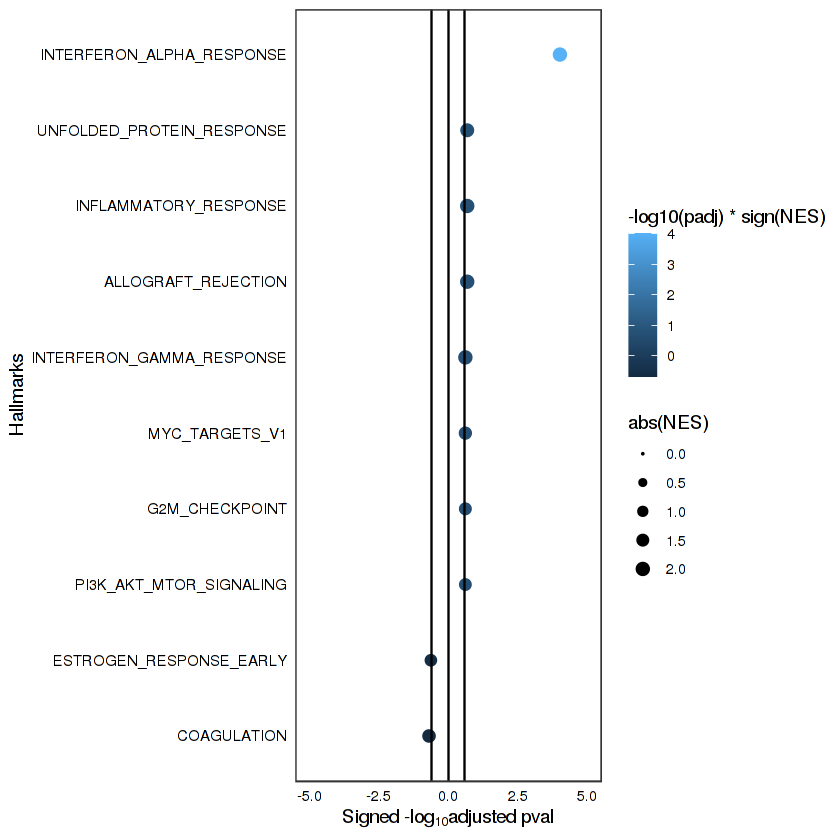

In [23]:
gl5 <- makeGeneList(results5)
res5gsea <- fgsea(pathways = h, stats = gl5, minSize = 0, maxSize =1000)
res5gsea$ranking <- -log10(res5gsea$pval) * sign(res5gsea$NES)
plotGSEA_Hallmark(res5gsea)